In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats import binomtest
from scipy.stats import chisquare
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv("data/Pokemon.csv")
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [25]:
label_counts = df['Type 1'].value_counts()
label_counts

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

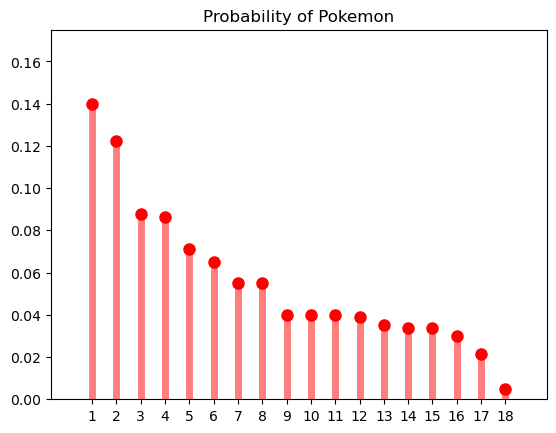

In [32]:
Pokemon_counts = np.array(label_counts)
Pokemon_probs = Pokemon_counts / sum(Pokemon_counts)
num_faces = len(Pokemon_probs)
x = np.linspace(1,num_faces, num_faces)
fig, ax = plt.subplots(1, 1)
ax.plot(x, Pokemon_probs, 'ro', ms=8 )
ax.vlines(x, 0, Pokemon_probs, colors='r', lw=5, alpha=0.5)
ax.set_ylim(ymin=0, ymax=max(Pokemon_probs)*1.25)
ax.set_xticks(x)
ax.set_title(u'Probability of Pokemon')
plt.margins(0.1)
plt.show()


In [30]:
dice_roll_counts = np.array(label_counts )
dice_roll_counts

array([112,  98,  70,  69,  57,  52,  44,  44,  32,  32,  32,  31,  28,
        27,  27,  24,  17,   4])

In [34]:
expected_counts = len(df) / len(label_counts)

chi2_stat, p_value = chisquare(label_counts, f_exp=expected_counts)

print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p_value)


Chi-Square Statistic: 297.7750000000001
p-value: 3.2397367190930687e-53
